#Trabalho 3 de Ciência de Dados: Spam prediction

Classificador final, baseado em instâncias, usando o algoritmo do vizinho mais próximo (knn).

Alunas:

*   Milena Lucas dos Santos
*   Raianny Proença de C. Oliveira
*   Vivian Miwa Fugihara


# Imports

In [ ]:
import pandas as pd
import numpy as np
from time import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from google.colab import files
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import imblearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Upload do dataset

In [ ]:
# faz upload de arquivo da base de dados
dataset = files.upload()

In [ ]:
dataset # mostra o arquivo lido separado por virgulas

{'test.csv': b';the;to;ect;and;for;of;a;you;hou;in;on;is;this;enron;i;be;that;will;have;with;your;at;we;s;are;it;by;com;as;from;gas;or;not;me;deal;if;meter;hpl;please;re;e;any;our;corp;can;d;all;has;was;know;need;an;forwarded;new;t;may;up;j;mmbtu;should;do;am;get;out;see;no;there;price;daren;but;been;company;l;these;let;so;would;m;into;xls;farmer;attached;us;information;they;message;day;time;my;one;what;only;http;th;volume;mail;contract;which;month;more;robert;sitara;about;texas;nom;energy;pec;questions;www;deals;volumes;pm;ena;now;their;file;some;email;just;also;call;change;other;here;like;b;flow;net;following;p;production;when;over;back;want;original;them;below;o;ticket;c;he;could;make;inc;report;march;contact;were;days;list;nomination;system;who;april;number;sale;don;its;first;thanks;business;help;per;through;july;forward;font;free;daily;use;order;today;r;had;fw;set;plant;statements;go;gary;oil;line;sales;w;effective;well;tenaska;take;june;x;within;nbsp;she;how;north;america;being;u

In [ ]:
# joga pra um dataframe
# COLOQUE AQUI O NOME DO ARQUIVO CSV FEITO DO UPLOAD
dataset = pd.read_csv('test_set.csv', sep=',')
dataset

Unnamed: 0   Email No.  the  to  ...  allowing  ff  dry  Prediction
0            773   Email 774    5  12  ...         0   4    0           0
1           2236  Email 2237    0   0  ...         0   0    0           0
2            554   Email 555    1   0  ...         0   0    0           1
3           4709  Email 4710    1   4  ...         0   0    0           0
4             39    Email 40    8   4  ...         0   2    0           1
...          ...         ...  ...  ..  ...       ...  ..  ...         ...
1030        2659  Email 2660    1   1  ...         0   0    0           1
1031        4901  Email 4902    3   3  ...         0   0    0           0
1032        2252  Email 2253    0   0  ...         0   0    0           0
1033        4988  Email 4989    5   6  ...         0   0    0           0
1034         331   Email 332    0   2  ...         0   0    0           1

[1035 rows x 3003 columns]

# Manipulando o dataset

In [ ]:
# remover coluna com número do email, pois não é um atributo preditivo relevante por ter valores únicos.
dataf = dataset.drop(["Email No."], axis=1)

In [ ]:
# mostrar linhas (qdte emails) e colunas (qtde atributos)
dataf.shape

(1035, 3002)

In [ ]:
dataframe = pd.DataFrame(dataf.drop(["Prediction"], axis=1))

# Normalizando os dados

## Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
dt_stan = pd.DataFrame(scaler1.fit_transform(dataframe), columns = dataframe.columns)

In [ ]:
dt_stan

# Balanceamento dos dados

In [ ]:
# passa para X somente os atributos preditivos, tirando a classe Prediction
#dados normalizados com standard
X = pd.DataFrame(dt_stan)

# passa para y a classe Prediction
y = pd.DataFrame(dataf["Prediction"])

Cluester Centroid

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio= 'majority')

X_cc, y_cc = cc.fit_sample(X, y)

model = KNeighborsClassifier(n_neighbors=3,weights='distance', metric='euclidean')
scores = cross_val_score(model,X_cc, y_cc, cv = 10, scoring = 'accuracy')
print("Accuracy: %.2f%%" % (scores.mean() * 100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 62.76%


In [ ]:
#transforma o array X_cc e y_cc em um dataframe
Xcc = pd.DataFrame(X_cc, columns= X.columns)
y_prediction = pd.DataFrame(y_cc,columns= ['Prediction'])

dt_stan_cc = pd.concat([Xcc, y_prediction],axis=1)
X_train, X_test, y_train, y_test = train_test_split(Xcc, y_prediction, test_size=0.1,random_state=42)

# Redução de Dimensionalidade por Seleção de Atributos


Correlação de Spearman

In [ ]:
from scipy.stats import pearsonr #

In [ ]:
#selecao de atributos por correlacao #
def cor_selection(dt, prediction, nattr):
  cor_list = []
  for i in dt.columns.tolist():
    #relaciona cada atributo existente com a classe target
    #atributos que tem uma correlaçao forte com a classe, quer dizer que sao bons atributos preditivos, simples e mais usado
    cor = pearsonr(dt[i], prediction)[0]
    cor_list.append(cor)
  
  #retorna quais features foram selecionadas
  #argsort, ordena em ordem crescente
  #abs, pq pode ter correlacao negativa, correlacao postivia e negativa sao importantes
  cor_feature = dt.columns[np.argsort(np.abs(cor_list))][-nattr:].tolist()
  #cor_support, coloca true nos atributos selecionados de todos os 200
  cor_support = [True if i in cor_feature else False for i in dt.columns.tolist()]

  return cor_feature, cor_support

In [ ]:
#retorna os atributos com maior correlacao #
#retorna os 50 atributos com maior correlacao, nattr -> 50
#cor_selected = cor_feature

cor_selected, cor_support = cor_selection(dt_stan_cc.drop(['Prediction'],axis=1), dt_stan_cc['Prediction'],500)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


### Baseado em Filtros

Correlação de Spearman

In [ ]:
from scipy.stats import pearsonr #

In [ ]:
#selecao de atributos por correlacao #
def cor_selection(dt, prediction, nattr):
  cor_list = []
  for i in dt.columns.tolist():
    #relaciona cada atributo existente com a classe target
    #atributos que tem uma correlaçao forte com a classe, quer dizer que sao bons atributos preditivos, simples e mais usado
    cor = pearsonr(dt[i], prediction)[0]
    cor_list.append(cor)
  
  #retorna quais features foram selecionadas
  #argsort, ordena em ordem crescente
  #abs, pq pode ter correlacao negativa, correlacao postivia e negativa sao importantes
  cor_feature = dt.columns[np.argsort(np.abs(cor_list))][-nattr:].tolist()
  #cor_support, coloca true nos atributos selecionados de todos os 200
  cor_support = [True if i in cor_feature else False for i in dt.columns.tolist()]

  return cor_feature, cor_support

In [ ]:
#retorna os atributos com maior correlacao #
#retorna os 50 atributos com maior correlacao, nattr -> 50
#cor_selected = cor_feature

cor_selected, cor_support = cor_selection(dt_stan_cc.drop(['Prediction'],axis=1), dt_stan_cc['Prediction'],500)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [ ]:
cor_selected #

Chi Quadrado

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

def chi_selection(dt, prediction, nattr):
  cor_list = []
  X_norm = MinMaxScaler().fit_transform(dt)

  chi_selector = SelectKBest(chi2, k=nattr)
  chi_selector.fit(X_norm, prediction)
  chi_support = chi_selector.get_support()
  chi_selected = dt.loc[:,chi_support].columns.tolist()

  return chi_selected, chi_support

In [ ]:
chi_selected, chi_support = chi_selection(dt_stan_cc.drop(['Prediction'],axis=1), dt_stan_cc['Prediction'],500)

In [ ]:
chi_selected

### Baseados em Wrapper

Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
def RFE_selection(dt, prediction, nattr): # usando regressão logistica
  rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select = nattr, step=10, verbose=1) # step: iterações
  rfe_selector.fit(dt, prediction)
  rfe_support = rfe_selector.get_support()
  rfe_feature = dt.loc[:,rfe_support].columns.tolist()
  
  return rfe_feature, rfe_support


In [ ]:
rfe_selected, rfe_support = RFE_selection(X_train, y_train, 500)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 3001 features.
Fitting estimator with 2991 features.
Fitting estimator with 2981 features.
Fitting estimator with 2971 features.
Fitting estimator with 2961 features.
Fitting estimator with 2951 features.
Fitting estimator with 2941 features.
Fitting estimator with 2931 features.
Fitting estimator with 2921 features.
Fitting estimator with 2911 features.
Fitting estimator with 2901 features.
Fitting estimator with 2891 features.
Fitting estimator with 2881 features.
Fitting estimator with 2871 features.
Fitting estimator with 2861 features.
Fitting estimator with 2851 features.
Fitting estimator with 2841 features.
Fitting estimator with 2831 features.
Fitting estimator with 2821 features.
Fitting estimator with 2811 features.
Fitting estimator with 2801 features.
Fitting estimator with 2791 features.
Fitting estimator with 2781 features.
Fitting estimator with 2771 features.
Fitting estimator with 2761 features.
Fitting estimator with 2751 features.
Fitting esti

In [ ]:
rfe_selected

### Embedded

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def embedded_selection(df, prediction, nattr):
  embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=nattr) # 100 florestas, n atributos
  embeded_rf_selector.fit(df, prediction)

  embeded_rf_support = embeded_rf_selector.get_support()
  embeded_rf_feature = X.loc[:, embeded_rf_support].columns.tolist()

  print(str(len(embeded_rf_feature)), 'selected features')

  return embeded_rf_feature, embeded_rf_support

In [ ]:
embedded_selected, embedded_support = embedded_selection(dt_stan_cc.drop(['Prediction'],axis=1), dt_stan_cc['Prediction'],500)

500 selected features


In [ ]:
embedded_selected

## Comparação entre os Métodos de Seleção de Atributos

In [ ]:
feature_selection_results = pd.DataFrame({'Feature': X.columns.tolist(), 'Pearson' : cor_support, 'Chi' : chi_support, #
                                           'RFE' : rfe_support, 'Embedded' : embedded_support})

feature_selection_results['Total'] = np.sum(feature_selection_results, axis=1)

In [ ]:
feature_selection_results = feature_selection_results.sort_values(['Total', 'Feature'], ascending=False)

In [ ]:
feature_selection_results.head(110)

### Novo Dataset com os melhores atributos

In [ ]:
# guarda todos atributos que tem o total == 4 #
best = feature_selection_results.loc[feature_selection_results['Total'] == 4] 

# transforma a coluna 'feature' em lista 
best_feat = best['Feature'].tolist() 

# transforma os atributos do df original em uma lista
features_orign = X.columns.tolist()

#dataset original transposto 
transp_orign = dt_stan_cc.T 

# nomeando a coluna index para conseguir manipular ela
transp_orign.index.name = 'features'

# lista dos melhores atributos vira um dataframe e nomeia a coluna index
best_feat = pd.DataFrame(data = best_feat, columns=['features'])
best_feat.set_index('features')

# merge do df original com o df melhores atributos, ele deixa só os comuns
# aqui as features são a segunda coluna
best_attributes = pd.merge(transp_orign, best_feat, how='inner', on = 'features') 

# transforma as features em coluna index antes de transpor
best_attributes = best_attributes.set_index('features')

new_dataframe = best_attributes.T
new_dataframe.head(3)

features       the        ect       for  ...      ward      aren        tm
0         1.728283   1.559033  1.141750  ...  4.544277  0.514426 -0.250024
1        -0.554400  -0.318604 -0.405297  ... -0.282420 -0.354140 -0.250024
2         5.205771  13.749064  6.283062  ...  7.826431  1.382992  3.215706

[3 rows x 129 columns]

In [ ]:
new = pd.concat([new_dataframe, y_prediction],axis=1) #
new.head(3)

the        ect       for  ...      aren        tm  Prediction
0  1.728283   1.559033  1.141750  ...  0.514426 -0.250024           0
1 -0.554400  -0.318604 -0.405297  ... -0.354140 -0.250024           0
2  5.205771  13.749064  6.283062  ...  1.382992  3.215706           0

[3 rows x 130 columns]

X e y do novo dataset 

In [ ]:
# fazendo o split do teste e treino do novo dataset #
# criando outras variáveis para representar o X e o y, para não misturar com a análise de outra parte do trabalho 
Xnew = new.drop(['Prediction'], axis=1)
ynew = new['Prediction']

Xnew_train, Xnew_test, ynew_train, ynew_test = train_test_split(Xnew, ynew, test_size=0.1)

# Resultado Final

KNN

K = 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
import sklearn

xtest = Xnew_test
xtrain = Xnew_train

model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5,metric = 'euclidean') 
model.fit(xtrain, ynew_train)
y_pred = model.predict(xtest)

acc = accuracy_score(ynew_test, y_pred)
print(acc)

0.9508196721311475


O nosso classificador final gira em torno de 85% a 95% de acurácia.

In [ ]:
model = KNeighborsClassifier(n_neighbors=5) #
scores = cross_val_score(model, Xnew, ynew, cv = 10, scoring = 'accuracy')
scores

array([0.95081967, 0.95081967, 0.9       , 0.96666667, 0.91666667,
       0.95      , 0.8       , 0.85      , 0.81666667, 0.66666667])

In [ ]:
print("Accuracy: %.2f%%" % (scores.mean() * 100.0)) #

# Matriz Confusão 

A matriz de confusão ajuda a compreender as previsões corretas e incorretas do classificador.

Confusion matrix:
 [[16  3]
 [ 0 42]]


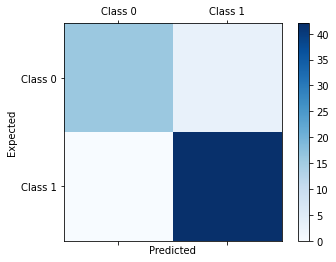

In [ ]:
#matriz de confusão para ver quanto o algoritmo acerta e erra 
conf_mat = confusion_matrix(y_true=ynew_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()